<a href="https://colab.research.google.com/github/atifBegan/data-structures-algorithms-python/blob/master/Copy_of_hpp_bivariate_model_implementation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [ ]:
df_eda = pd.read_csv("hpp_eda.csv")

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21581 entries, 0 to 21580
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21581 non-null  int64  
 1   price               21581 non-null  float64
 2   room_bed            21581 non-null  float64
 3   room_bath           21581 non-null  float64
 4   living_measure      21581 non-null  float64
 5   lot_measure         21581 non-null  float64
 6   ceil                21581 non-null  float64
 7   coast               21581 non-null  float64
 8   sight               21581 non-null  float64
 9   condition           21581 non-null  float64
 10  quality             21581 non-null  float64
 11  ceil_measure        21581 non-null  float64
 12  basement            21581 non-null  float64
 13  zipcode             21581 non-null  float64
 14  living_measure15    21581 non-null  float64
 15  lot_measure15       21581 non-null  float64
 16  furn

In [ ]:
df_eda.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21581 entries, 0 to 21580
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21581 non-null  float64
 1   room_bed            21581 non-null  float64
 2   room_bath           21581 non-null  float64
 3   living_measure      21581 non-null  float64
 4   lot_measure         21581 non-null  float64
 5   ceil                21581 non-null  float64
 6   coast               21581 non-null  float64
 7   sight               21581 non-null  float64
 8   condition           21581 non-null  float64
 9   quality             21581 non-null  float64
 10  ceil_measure        21581 non-null  float64
 11  basement            21581 non-null  float64
 12  zipcode             21581 non-null  float64
 13  living_measure15    21581 non-null  float64
 14  lot_measure15       21581 non-null  float64
 15  furnished           21581 non-null  float64
 16  hous

In [ ]:
df_eda.drop(['zipcode'], axis=1, inplace=True)

In [ ]:
df_eda.drop(['house_age'], axis=1, inplace=True)

In [ ]:
df_eda.drop(['house_sold_date'], axis=1, inplace=True)

In [ ]:
df_dependent=pd.DataFrame(df_eda.pop('price'))

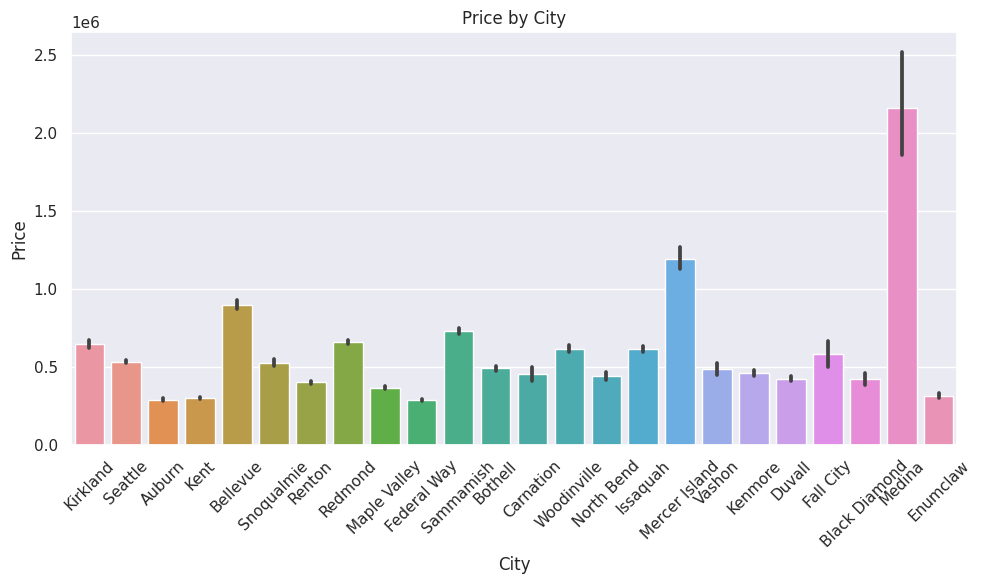

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for bivariate analysis on city variable
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='city', y=df_dependent.squeeze(), data=df_eda)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price by City')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()  # Adjust the spacing of the plot
plt.show()

room_bed              0.307760
room_bath             0.524684
living_measure        0.702171
lot_measure           0.089619
ceil                  0.256796
coast                 0.266078
sight                 0.396993
condition             0.035449
quality               0.667565
ceil_measure          0.605668
basement              0.323887
living_measure15      0.584088
lot_measure15         0.082529
furnished             0.566118
property_age_group    0.122167
property_renovated    0.126152
dtype: float64


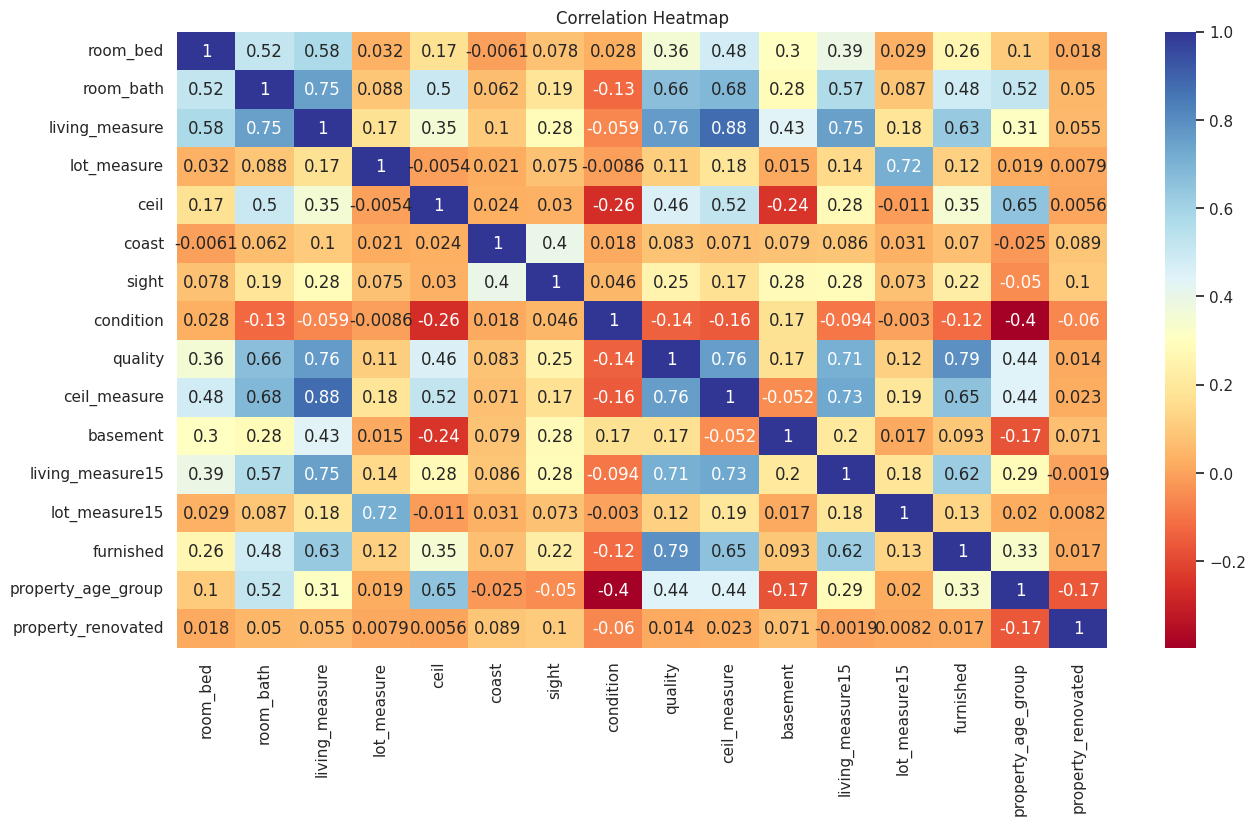

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for bivariate analysis
numerical_columns = ['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight',
                     'condition', 'quality', 'ceil_measure', 'basement', 'living_measure15',
                     'lot_measure15', 'furnished', 'property_age_group', 'property_renovated']

# Calculate the correlation coefficients for bivariate analysis
correlation_df = df_eda[numerical_columns].corrwith(df_dependent.squeeze())

# Print the correlation coefficients with 'price'
print(correlation_df)

# Calculate the correlation matrix
correlation_matrix = df_eda[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical data
scaler = StandardScaler()
df_eda[numerical_columns] = scaler.fit_transform(df_eda[numerical_columns])

# Convert "city" column into dummy variables
city_dummies = pd.get_dummies(df_eda['city'], prefix='city', drop_first=True)

# Concatenate the dummy variables with the original dataframe
df_eda = pd.concat([df_eda, city_dummies], axis=1)

# Drop the original "city" column
df_eda.drop('city', axis=1, inplace=True)

In [ ]:
# Calculate z-scores for each numerical column
z_scores = np.abs((df_eda - df_eda.mean()) / df_eda.std())

# Define z-score threshold
z_score_threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > z_score_threshold)

# Remove outliers from the dataset
df_cleaned = df_eda.drop(outlier_indices[0])

# Check the shape of the cleaned dataset
print("Original shape:", df_eda.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (21581, 39)
Cleaned shape: (8734, 39)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_eda, df_dependent.squeeze(), test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor model
model = RandomForestRegressor()


# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top-k most important features
top_features = importance_df.head()
print(top_features)

               Feature  Importance
8              quality    0.334900
2       living_measure    0.251934
11    living_measure15    0.052215
14  property_age_group    0.047910
12       lot_measure15    0.041442


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_eda, df_dependent.squeeze(), test_size=0.2, random_state=42)

# Create and fit the KNN regression model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


# visualizing the result
df_regressor_result_KNNreg_rmse = pd.DataFrame({'RMSE_KNNreg':mse},index=['Original'])
df_regressor_result_KNNreg_r2 = pd.DataFrame({'AdjRsquare_KNNreg':r2},index=['Original'])


In [ ]:
adjusted_rsquare=1-((1-r2_score(y_test, y_pred))*(X_test.shape[0])/((X_test.shape[0]-X_test.shape[1])-1))
print(adjusted_rsquare)
df_regressor_result_KNNreg_adjr2 = pd.DataFrame({'AdjRsquare_KNNreg':adjusted_rsquare},index=['Original'])
df_regressor_result_KNNreg=pd.concat([df_regressor_result_KNNreg_rmse,df_regressor_result_KNNreg_adjr2],axis=1)

0.7365609528574097


In [ ]:
df_regressor_result=df_regressor_result_KNNreg

In [ ]:
print(df_regressor_result)

           RMSE_KNNreg  AdjRsquare_KNNreg
Original  183462.97634           0.736561


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_eda, df_dependent.squeeze(), test_size=0.2, random_state=42)

# Define the Random Forest Regression model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
adjusted_rsquare=1-((1-r2_score(y_test, y_pred))*(X_test.shape[0])/((X_test.shape[0]-X_test.shape[1])-1))
df_regressor_result_RFRreg_rmse = pd.DataFrame({'RMSE_RFRreg':rmse},index=['Original'])
df_regressor_result_RFRreg_adjr2 = pd.DataFrame({'AdjRsquare_RFRreg':adjusted_rsquare}, index=['Original'])
df_regressor_result_RFRreg=pd.concat([df_regressor_result_RFRreg_rmse,df_regressor_result_RFRreg_adjr2],axis=1)

In [ ]:
df_regressor_result=pd.concat([df_regressor_result,df_regressor_result_RFRreg],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
# Assuming X_train and y_train are your training data
# Assuming importance_df is the dataframe containing feature importances

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_eda, df_dependent.squeeze(), test_size=0.2, random_state=42)


# Initialize a Linear Regression model
model = LinearRegression()

# Fit the model on the selected training data
model.fit(X_train, y_train)

# Make predictions on the test data using the selected features
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
adjusted_rsquare=1-((1-r2_score(y_test, y_pred))*(X_test.shape[0])/((X_test.shape[0]-X_test.shape[1])-1))
df_regressor_result_LRreg_rmse = pd.DataFrame({'RMSE_LRreg':rmse},index=['Original'])
df_regressor_result_LRreg_adjr2 = pd.DataFrame({'AdjRsquare_LRreg':adjusted_rsquare},index=['Original'])
df_regressor_result_LRreg=pd.concat([df_regressor_result_LRreg_rmse,df_regressor_result_LRreg_adjr2],axis=1)

In [ ]:
df_regressor_result=pd.concat([df_regressor_result,df_regressor_result_LRreg],axis=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the top-k most important features
selected_features = importance_df['Feature']

# Select the top important features from the training and test data
X_train_top = X_train[selected_features]
X_test_top = X_test[selected_features]

# Create and fit the KNN regression model
knn_reg = DecisionTreeRegressor()
knn_reg.fit(X_train_top, y_train)

# Predict on the test set
y_pred = knn_reg.predict(X_test_top)

# Evaluate the model
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adjusted_rsquare=1-((1-r2_score(y_test, y_pred))*(X_test.shape[0])/((X_test.shape[0]-X_test.shape[1])-1))
# visualizing the result
df_regressor_result_DTRreg_rmse = pd.DataFrame({'RMSE_DTRreg':mse},index=['Original'])
df_regressor_result_DTRreg_adjr2 = pd.DataFrame({'AdjRsquare_DTRreg':adjusted_rsquare},index=['Original'])
df_regressor_result_DTRreg=pd.concat([df_regressor_result_DTRreg_rmse,df_regressor_result_DTRreg_adjr2],axis=1)

In [ ]:
df_regressor_result=pd.concat([df_regressor_result,df_regressor_result_DTRreg],axis=1)

In [ ]:
df_regressor_result

,RMSE_KNNreg,AdjRsquare_KNNreg,RMSE_RFRreg,AdjRsquare_RFRreg,RMSE_LRreg,AdjRsquare_LRreg,RMSE_DTRreg,AdjRsquare_DTRreg
Original,183462.97634,0.736561,145848.012819,0.833511,182324.585569,0.73982,223252.271209,0.609901
